In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# The primary objective of this EDA is to analyze historical space mission data to uncover patterns, trends, and insights about space exploration from 1957 to 1970. We'll examine mission success rates, country contributions, rocket usage, temporal trends, and other interesting aspects of early space exploration.

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df = pd.read_csv('space_missions.csv', encoding='latin1')

In [ ]:
# Set up visualization style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# 1. Basic Dataset Overview
print("=== BASIC DATASET OVERVIEW ===")
print(f"Shape of dataset: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and non-null counts:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

=== BASIC DATASET OVERVIEW ===
Shape of dataset: (4630, 9)

First 5 rows:
     Company                                   Location        Date      Time  \
0  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04  19:28:00   
1  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03  02:30:00   
2    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06  16:44:00   
3       AMBA   LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01  03:48:00   
4    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05  07:33:00   

           Rocket         Mission RocketStatus Price MissionStatus  
0  Sputnik 8K71PS       Sputnik-1      Retired   NaN       Success  
1  Sputnik 8K71PS       Sputnik-2      Retired   NaN       Success  
2        Vanguard    Vanguard TV3      Retired   NaN       Failure  
3          Juno I      Explorer 1      Retired   NaN       Success  
4        Vanguard  Vanguard TV3BU      Retired   NaN       Failure  

Data types and non-null 

In [ ]:
# 2. Data Cleaning and Preparation
# Convert Date to datetime and extract year/month
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Extract country from Location
def extract_country(location):
    if 'USA' in location:
        return 'USA'
    elif 'Kazakhstan' in location:
        return 'USSR'
    elif 'Russia' in location:
        return 'USSR'
    elif 'Algeria' in location:
        return 'France'  # Hammaguir was French at the time
    elif 'Australia' in location:
        return 'UK'  # Woomera was British at the time
    elif 'Japan' in location:
        return 'Japan'
    elif 'China' in location:
        return 'China'
    elif 'French Guiana' in location:
        return 'France'
    elif 'Kenya' in location:
        return 'Italy'  # San Marco platform
    else:
        return 'Other'

df['Country'] = df['Location'].apply(extract_country)


In [ ]:
# Clean Company names
df['Company'] = df['Company'].replace({
    'RVSN USSR': 'USSR',
    'US Navy': 'USA',
    'AMBA': 'USA',
    'US Air Force': 'USA',
    'NASA': 'USA',
    'General Dynamics': 'USA',
    'Martin Marietta': 'USA',
    'UT': 'Japan',
    'CECLES': 'Multinational',
    'ASI': 'Italy',
    'CNES': 'France',
    'CASC': 'China',
    'ISAS': 'Japan',
    'RAE': 'UK',
    'OKB-586': 'USSR',
    'Yuzhmash': 'USSR',
    'Roscosmos': 'USSR'
})


=== MISSION STATUS ANALYSIS ===
Mission Status Distribution (%):
MissionStatus
Success              89.892009
Failure               7.710583
Partial Failure       2.311015
Prelaunch Failure     0.086393
Name: proportion, dtype: float64


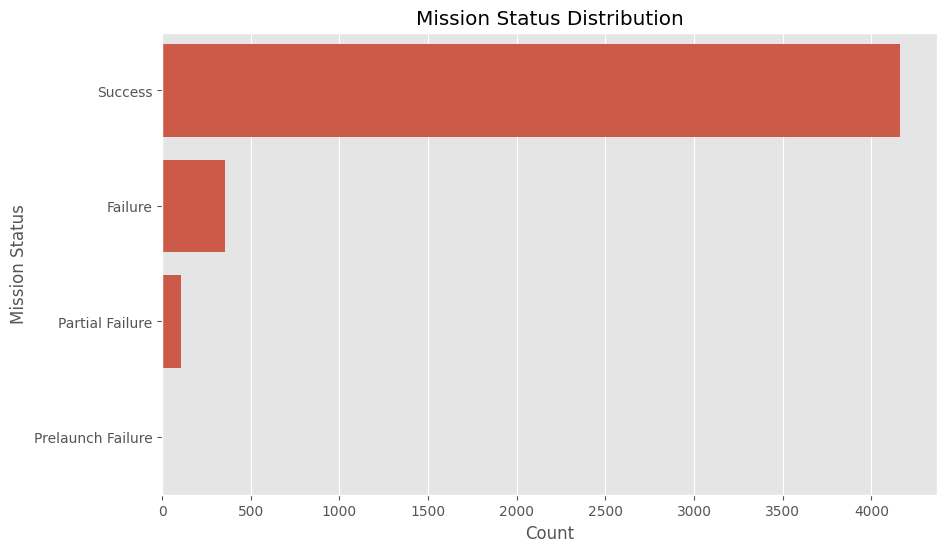

In [ ]:
# 3. Mission Status Analysis
print("\n=== MISSION STATUS ANALYSIS ===")
status_counts = df['MissionStatus'].value_counts(normalize=True) * 100
print("Mission Status Distribution (%):")
print(status_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='MissionStatus', order=df['MissionStatus'].value_counts().index)
plt.title('Mission Status Distribution')
plt.xlabel('Count')
plt.ylabel('Mission Status')
plt.show()



=== TEMPORAL ANALYSIS ===


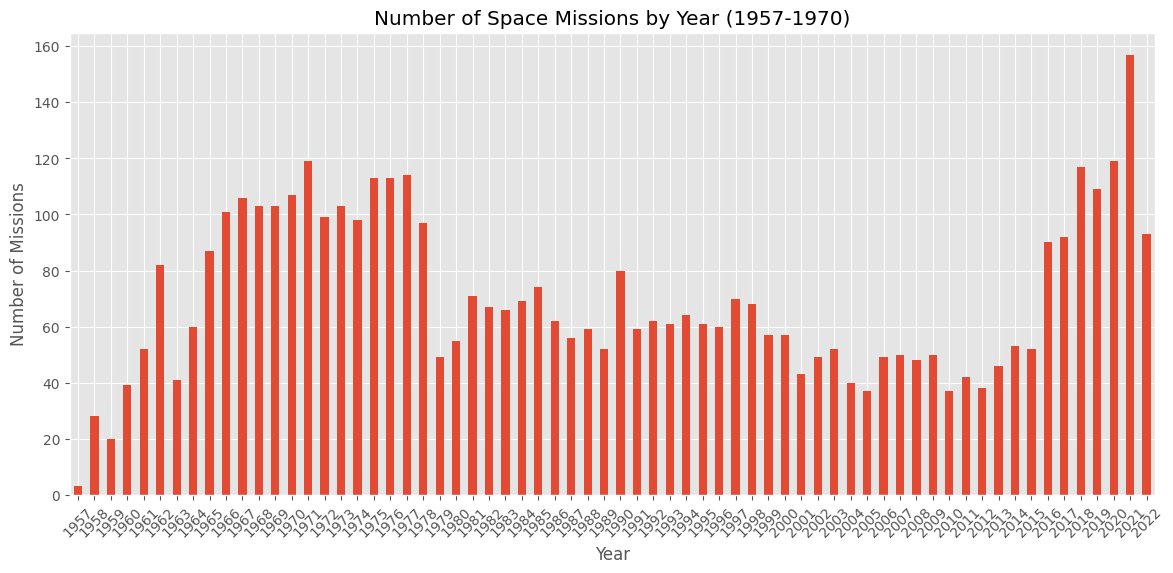

In [ ]:
# 4. Temporal Analysis
print("\n=== TEMPORAL ANALYSIS ===")
# Missions by year
missions_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
missions_by_year.plot(kind='bar')
plt.title('Number of Space Missions by Year (1957-1970)')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.show()

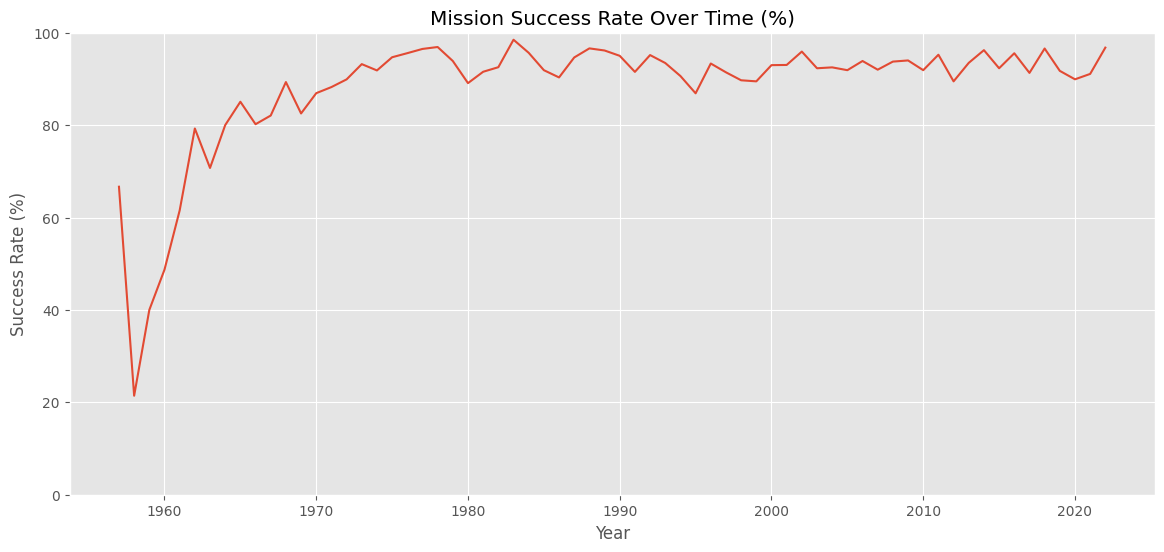

In [ ]:
# Success rate over time
success_rate = df.groupby('Year')['MissionStatus'].apply(
    lambda x: (x == 'Success').mean() * 100).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=success_rate, x='Year', y='MissionStatus')
plt.title('Mission Success Rate Over Time (%)')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.show()


=== GEOGRAPHICAL ANALYSIS ===


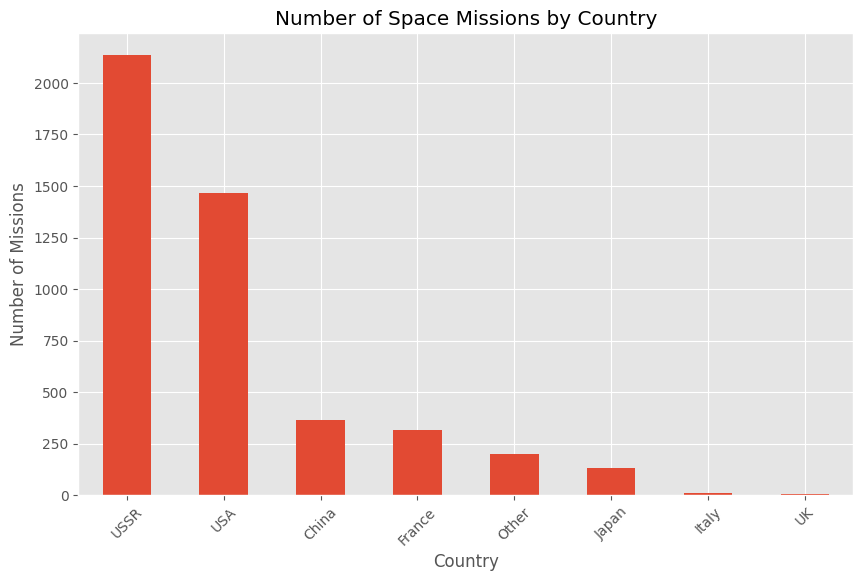

In [ ]:
# 5. Geographical Analysis
print("\n=== GEOGRAPHICAL ANALYSIS ===")
# Missions by country
country_counts = df['Country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Number of Space Missions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.show()


=== GEOGRAPHICAL ANALYSIS ===


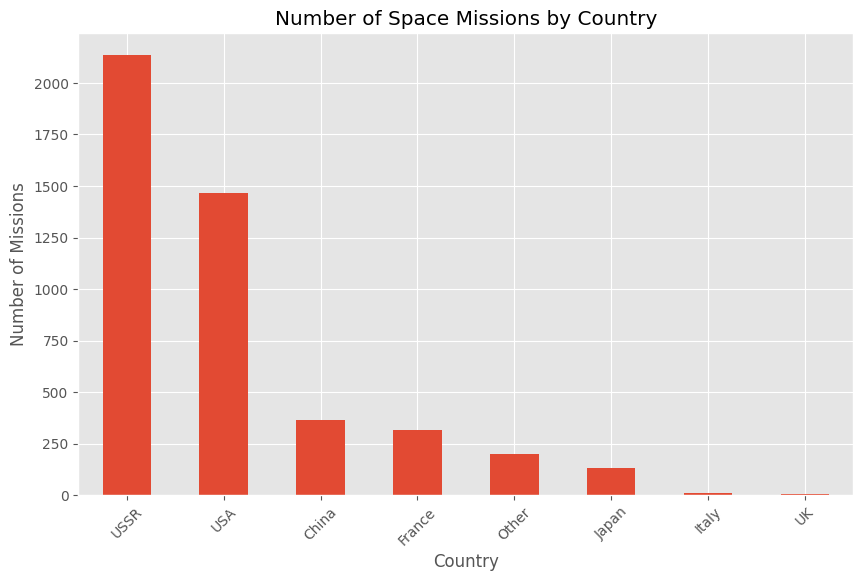

In [ ]:
# 5. Geographical Analysis
print("\n=== GEOGRAPHICAL ANALYSIS ===")
# Missions by country
country_counts = df['Country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Number of Space Missions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.show()

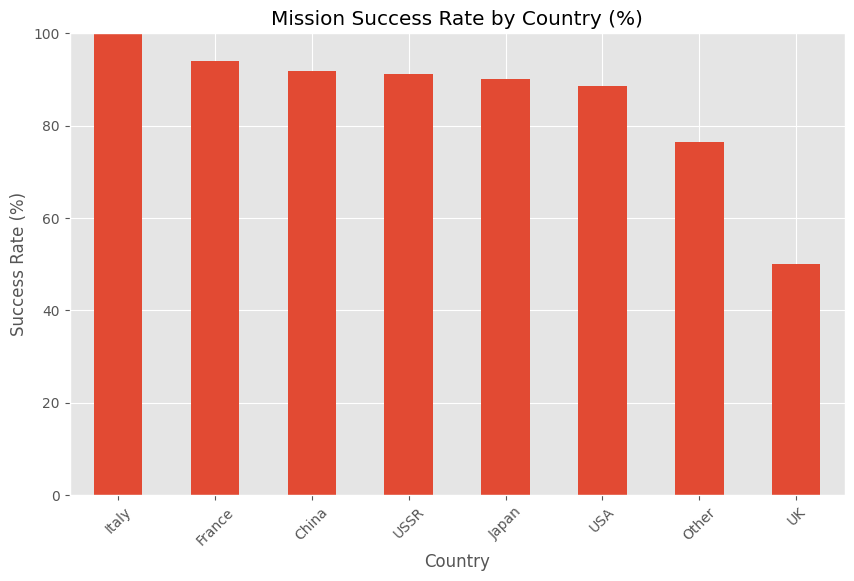

In [ ]:
# Success rate by country
country_success = df.groupby('Country')['MissionStatus'].apply(
    lambda x: (x == 'Success').mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
country_success.plot(kind='bar')
plt.title('Mission Success Rate by Country (%)')
plt.xlabel('Country')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()



=== ROCKET ANALYSIS ===


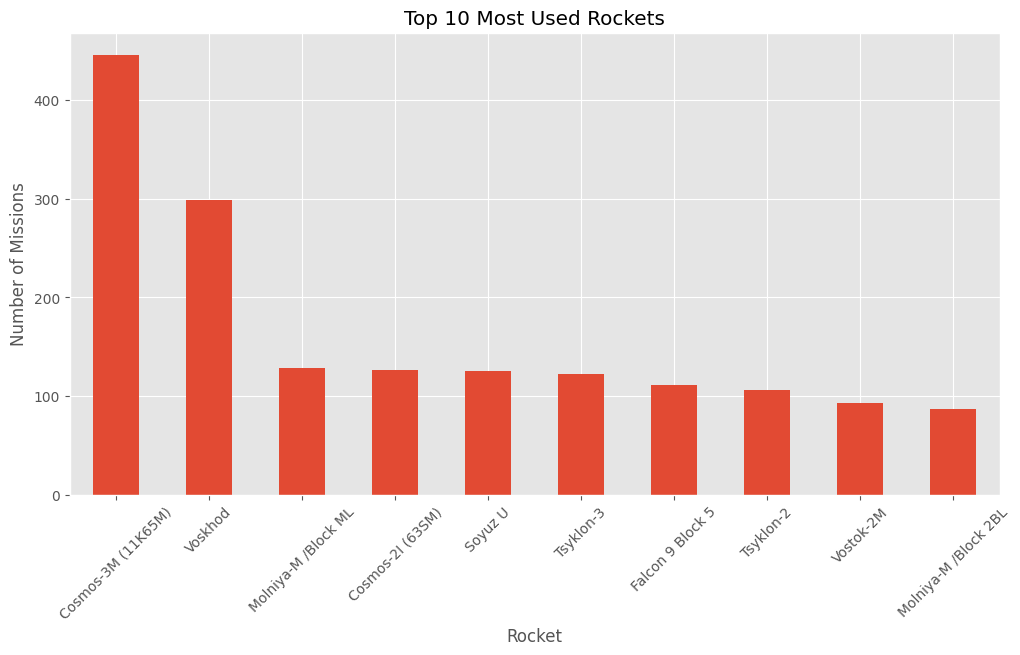

In [ ]:
# 6. Rocket Analysis
print("\n=== ROCKET ANALYSIS ===")
# Top 10 most used rockets
top_rockets = df['Rocket'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_rockets.plot(kind='bar')
plt.title('Top 10 Most Used Rockets')
plt.xlabel('Rocket')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Rocket success rates (for rockets with at least 5 launches)
rocket_stats = df.groupby('Rocket').agg(
    Total_Missions=('MissionStatus', 'size'),
    Success_Rate=('MissionStatus', lambda x: (x == 'Success').mean() * 100)
).sort_values('Total_Missions', ascending=False)

rocket_stats = rocket_stats[rocket_stats['Total_Missions'] >= 5]
print("\nRocket Statistics (with at least 5 launches):")
print(rocket_stats)


Rocket Statistics (with at least 5 launches):
                     Total_Missions  Success_Rate
Rocket                                           
Cosmos-3M (11K65M)              446     93.946188
Voskhod                         299     94.648829
Molniya-M /Block ML             128     95.312500
Cosmos-2I (63SM)                126     93.650794
Soyuz U                         125     94.400000
...                             ...           ...
Long March 3C/E                   5    100.000000
Atlas-H MSD                       5    100.000000
Delta II 7920-10                  5    100.000000
Diamant B                         5     60.000000
H-I UM-129A (9SO)                 5    100.000000

[173 rows x 2 columns]



=== COMPANY/ORGANIZATION ANALYSIS ===


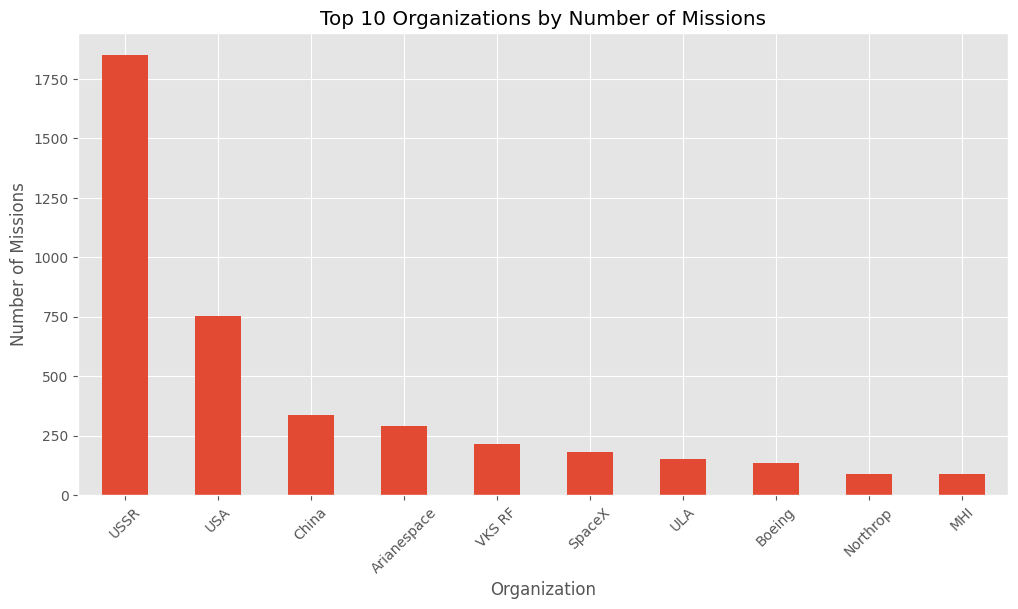

In [ ]:
# 7. Company/Organization Analysis
print("\n=== COMPANY/ORGANIZATION ANALYSIS ===")
# Top companies
top_companies = df['Company'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_companies.plot(kind='bar')
plt.title('Top 10 Organizations by Number of Missions')
plt.xlabel('Organization')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Company success rates
company_stats = df.groupby('Company').agg(
    Total_Missions=('MissionStatus', 'size'),
    Success_Rate=('MissionStatus', lambda x: (x == 'Success').mean() * 100)
).sort_values('Total_Missions', ascending=False)

print("\nCompany Statistics:")
print(company_stats.head(10))



Company Statistics:
             Total_Missions  Success_Rate
Company                                  
USSR                   1850     90.918919
USA                     754     82.758621
China                   338     94.082840
Arianespace             293     96.245734
VKS RF                  216     93.518519
SpaceX                  182     94.505495
ULA                     151     99.337748
Boeing                  136     96.323529
Northrop                 89     89.887640
MHI                      87     95.402299



=== TIME OF DAY ANALYSIS ===


<ipython-input-21-c673c604ad06>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_df['Hour'] = pd.to_datetime(time_df['Time']).dt.hour
<ipython-input-21-c673c604ad06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['Hour'] = pd.to_datetime(time_df['Time']).dt.hour


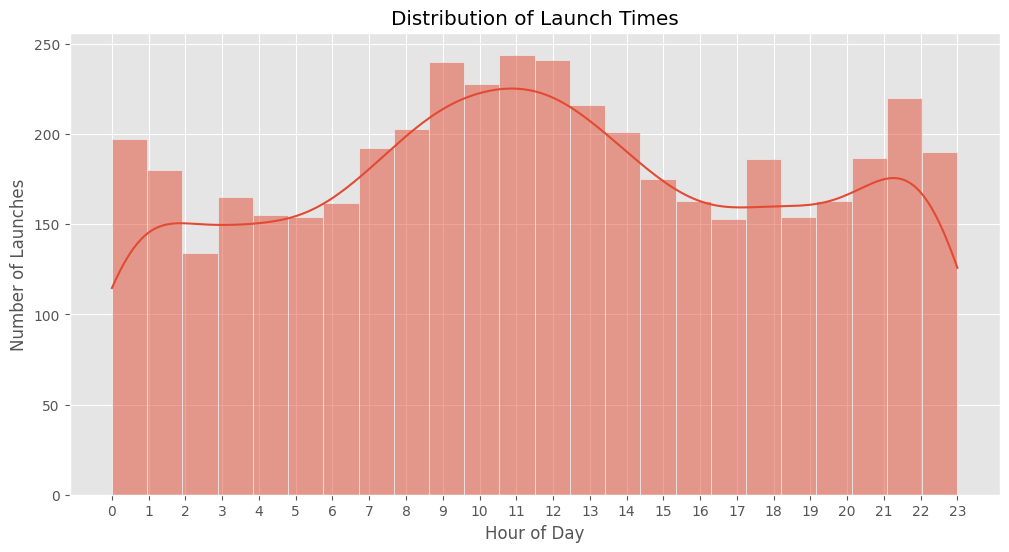

In [ ]:
# 8. Time of Day Analysis
print("\n=== TIME OF DAY ANALYSIS ===")
# Extract hour from Time (for missions with time data)
time_df = df.dropna(subset=['Time'])
time_df['Hour'] = pd.to_datetime(time_df['Time']).dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(data=time_df, x='Hour', bins=24, kde=True)
plt.title('Distribution of Launch Times')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Launches')
plt.xticks(range(0, 24))
plt.show()



=== PRICE ANALYSIS ===
Number of missions with price data: 1265


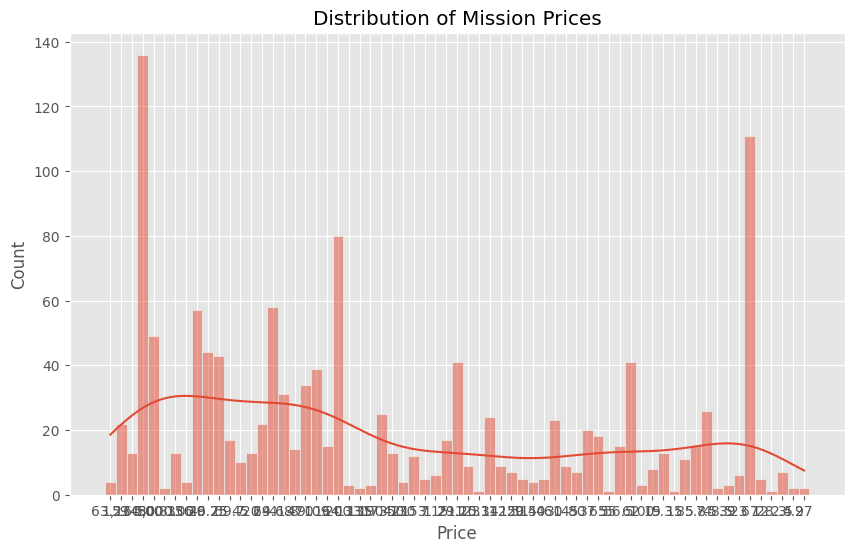

In [ ]:
# 9. Price Analysis (though most values are missing)
print("\n=== PRICE ANALYSIS ===")
print("Number of missions with price data:", df['Price'].notna().sum())
if df['Price'].notna().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Price'].dropna(), kde=True)
    plt.title('Distribution of Mission Prices')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()


In [ ]:
# 10. Rocket Status Analysis
print("\n=== ROCKET STATUS ANALYSIS ===")
print("Rocket Status Distribution:")
print(df['RocketStatus'].value_counts())


=== ROCKET STATUS ANALYSIS ===
Rocket Status Distribution:
RocketStatus
Retired    3620
Active     1010
Name: count, dtype: int64


In [ ]:
# 11. Additional Interesting Analysis: Mission Types
# Extract first word from Mission column as mission type
df['MissionType'] = df['Mission'].str.split().str[0]

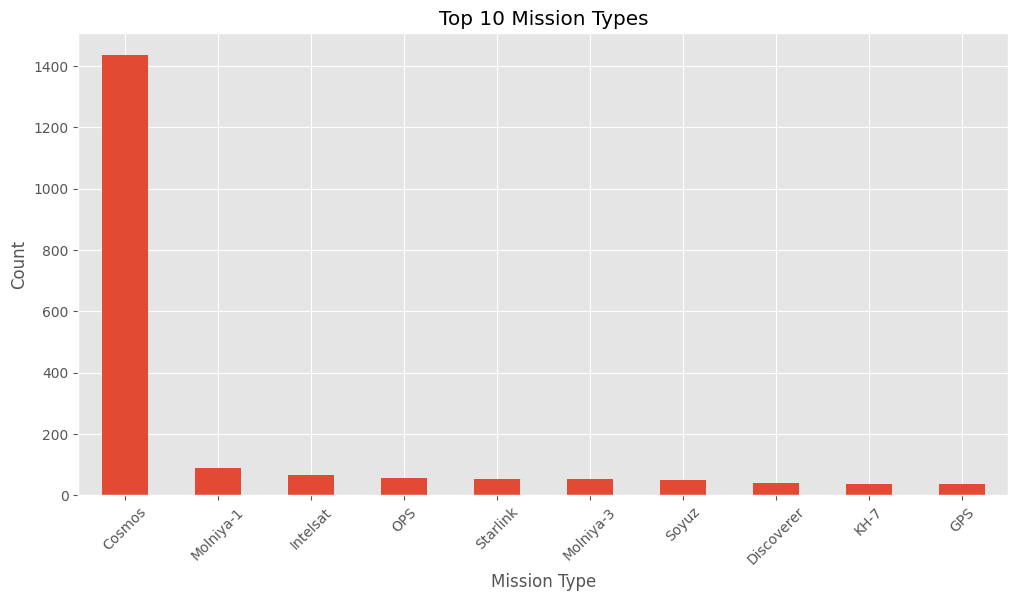

In [ ]:
# Top mission types
top_mission_types = df['MissionType'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_mission_types.plot(kind='bar')
plt.title('Top 10 Mission Types')
plt.xlabel('Mission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()